# Inference

In [4]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from src.model import PatentClassifier
import matplotlib.pyplot as plt

In [ ]:
# Load the checkpoint
checkpoint_path = '/home/fantoni/patent-sentence-classification/models/best-checkpoint_head.ckpt'
model_name = "anferico/bert-for-patents"
num_labels = 4

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Tokenizer and Base Model
bert_tokenizer = BertTokenizer.from_pretrained(model_name)
base_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Load Finetuned Patent Model
loaded_model = PatentClassifier.load_from_checkpoint(checkpoint_path, model=base_model, tokenizer=bert_tokenizer)
loaded_model.eval()
loaded_model.to(device)

{'predicted_class': 'STR', 'probabilities': [0.3, 0.48, 0.1, 0.12]}


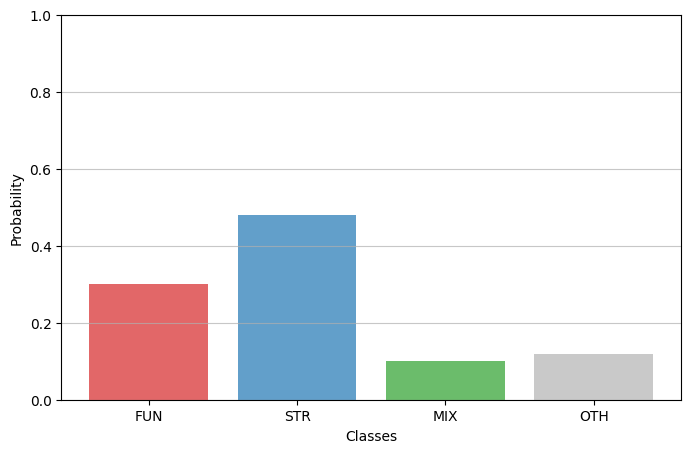

In [28]:
# Tokenize input
text_input = "the motor is not limited."
tokenizer = loaded_model.tokenizer  # Assuming tokenizer is part of the model
inputs = tokenizer(text_input, truncation=True, padding=True, max_length=512, return_tensors='pt')

# Perform inference
inputs = {k: v.to(device) for k, v in inputs.items()}  # move input to same device
int_to_label = {0: 'FUN', 1: 'STR', 2: 'MIX', 3: 'OTH'}
with torch.no_grad():
    outputs = loaded_model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)

result = {
    'predicted_class': int_to_label[predicted_class.item()],
    'probabilities': [round(prob, 2) for prob in probabilities[0].tolist()]
}

# Visulize Inference
print(result)
labels = list(int_to_label.values())
colors = ['#d62728', '#1f77b4', '#2ca02c', '#b2b2b2']  # Red, Blue, Green, Gray

# Plot the bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, result['probabilities'], color=colors, alpha=0.7)
plt.xlabel("Classes", fontsize=10)
plt.ylabel("Probability", fontsize=10)
plt.ylim(0, 1)  # Probabilities are between 0 and 1
plt.grid(axis='y', alpha=0.7)
plt.show()